# Data Analytics Assignment 2024

## Problem Statement: How different factors effect student performance


## LOADING AND CLEANING THE DATASET

In [1]:
## Making all the necessary imports
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
# Reading data
stdData = pd.read_csv("StudentPerformanceFactors.csv")
stdData

In [2]:
stdData.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [3]:
stdData.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
stdData.shape

(6607, 20)

In [5]:
stdData.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [6]:
#Deletion of irrelevant columns
stdData = stdData.drop(columns=['Extracurricular_Activities', 'Previous_Scores', 'Motivation_Level', 'Tutoring_Sessions', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender'])

In [7]:
stdData.head

<bound method NDFrame.head of       Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

      Sleep_Hours Internet_Access Family_Income Teacher_Q

In [8]:
stdData.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Internet_Access,Family_Income,Teacher_Quality,School_Type,Exam_Score
0,23,84,Low,High,7,Yes,Low,Medium,Public,67
1,19,64,Low,Medium,8,Yes,Medium,Medium,Public,61
2,24,98,Medium,Medium,7,Yes,Medium,Medium,Public,74
3,29,89,Low,Medium,8,Yes,Medium,Medium,Public,71
4,19,92,Medium,Medium,6,Yes,Medium,High,Public,70


In [9]:
# Identifies duplicate columns
stdData.columns.value_counts()

Hours_Studied           1
Attendance              1
Parental_Involvement    1
Access_to_Resources     1
Sleep_Hours             1
Internet_Access         1
Family_Income           1
Teacher_Quality         1
School_Type             1
Exam_Score              1
Name: count, dtype: int64

In [10]:
# checks for missing (NaN) values in the stdData DataFrame and returns a count of how many missing values are in each column.
missing_values = stdData.isnull().sum()
missing_values

Hours_Studied            0
Attendance               0
Parental_Involvement     0
Access_to_Resources      0
Sleep_Hours              0
Internet_Access          0
Family_Income            0
Teacher_Quality         78
School_Type              0
Exam_Score               0
dtype: int64

In [12]:
#Finding the mode of column 'Teacher_Quality' to use it to replace null cells
mode_value = stdData['Teacher_Quality'].mode()[0]

In [13]:
mode_value

'Medium'

In [14]:
stdData.fillna(mode_value, inplace = True)

In [15]:
# checking if there are still empty cells
missing_values = stdData.isnull().sum()
missing_values

Hours_Studied           0
Attendance              0
Parental_Involvement    0
Access_to_Resources     0
Sleep_Hours             0
Internet_Access         0
Family_Income           0
Teacher_Quality         0
School_Type             0
Exam_Score              0
dtype: int64

## MACHINE LEARNING: VALIDATION DATASET

In [18]:
# We imported this module to help us change string data to numeric data.
le = LabelEncoder()

In [19]:
# Here we are using the above module to pass the column name where our categorical data is. 
# It is worth mentioning that this approach wouldn't work well in columns with no Inherent order -- categories with no natural order like 'Red', 'Green', Yellow'
stdData['Parental_Involvement'] = le.fit_transform(stdData['Parental_Involvement'])
stdData['Access_to_Resources'] = le.fit_transform(stdData['Access_to_Resources'])
stdData['Internet_Access'] = le.fit_transform(stdData['Internet_Access'])
stdData['Family_Income'] = le.fit_transform(stdData['Family_Income'])
stdData['Teacher_Quality'] = le.fit_transform(stdData['Teacher_Quality'])
stdData['School_Type'] = le.fit_transform(stdData['School_Type'])

In [20]:
stdData.head() #visualizing changes

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Internet_Access,Family_Income,Teacher_Quality,School_Type,Exam_Score
0,23,84,1,0,7,1,1,2,1,67
1,19,64,1,2,8,1,2,2,1,61
2,24,98,2,2,7,1,2,2,1,74
3,29,89,1,2,8,1,2,2,1,71
4,19,92,2,2,6,1,2,0,1,70


In [21]:
# We are passing our dataframe values to an array and deviding our data set into training data(x) and testing data(y)
array = stdData.values
X = array[:, 0:8]
Y = array[:, 9]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [22]:
scoring = 'accuracy'

In [23]:
# I had to scale our training data because I was getting some an error in the logistic regression algorithm
# Error: ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT
#The solution was to scale the data set using the function below.
# StandardScaler helps normalize the features to have a mean of 0 and a standard deviation of 1, which can improve convergence during training.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [24]:
models = []
models.append(('LR', LogisticRegression(max_iter=200))) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    # Use the unscaled data for all models except Logistic Regression
    if name == 'LR':
        cv_results = model_selection.cross_val_score(model, X_train_scaled, Y_train, cv=kfold, scoring=scoring) ## Using our scaled train set here
    else:
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.224228 (0.013680)
LDA: 0.229711 (0.013396)
KNN: 0.170103 (0.015562)
CART: 0.186568 (0.015946)
NB: 0.035009 (0.014547)
SVM: 0.197544 (0.017246)


In [25]:
#It seems LDA has the best accuracy mean scoring about 0.23 and LR comes in second with 0.22
#LDA also has the lowest Standard deviation meaning its performance is pretty much consistent, and again LR comes in second.
# Overall these algorithms are underperforming in terms of accuracy.

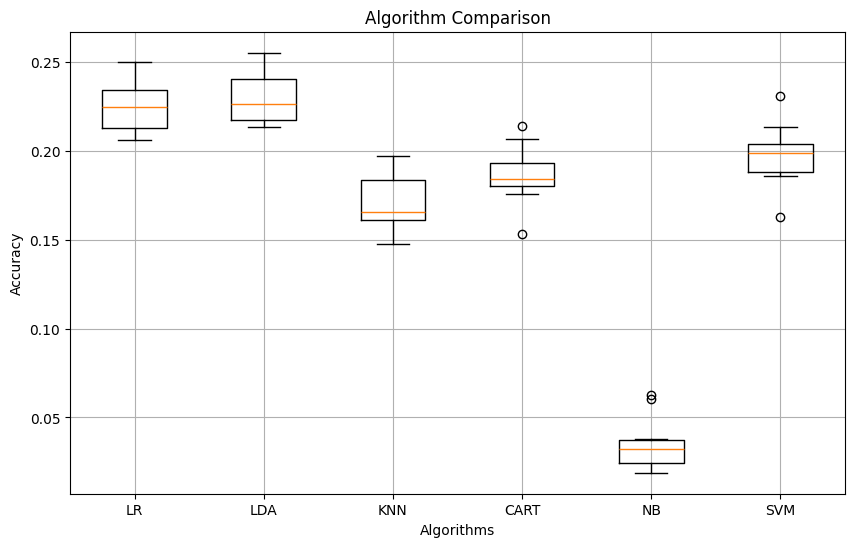

In [26]:
plt.figure(figsize=(10, 6))
plt.boxplot(results, tick_labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Algorithms')
plt.grid()
plt.show()

In [27]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print("\t=============================================\n")
print(confusion_matrix(Y_validation, predictions))
print("\t=============================================\n")
print(classification_report(Y_validation, predictions))

0.2314674735249622

[[ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  4  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  1  0  4  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  2  0  0  7  3  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  3  8  5 13  5  7  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  4 15 14 10  9  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  3  8 18 15 17  9  3  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  3  2 17 17 32 12  4  5  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 13 15 42 35 12 17  2  0  1  0  0  0  0  0  0  0  0  0
   1  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  7  8 45 39 24 23  6  2  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]


C:\Users\Snafe\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Snafe\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Snafe\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(